This notebook requires pyfabm. For instructions on how to build and install pyfabm, see https://fabm.net/python

In [ ]:
import numpy as np
import pyfabm

# Note: "%matplotlib widget" below enables interactive plots but requires https://matplotlib.org/ipympl/
# Alternatively you could use "%matplotlib notebook" (interactive but deprecated) or "%matplotlib inline" (static plots)
%matplotlib widget
import matplotlib.pyplot

# Redirect FABM output to logger to avoid cells filling up with initialization messages
import logging
pyfabm.logger = logging.getLogger()

In [ ]:
# Load the model configuration from a YAML file
model = pyfabm.Model("../fabm-gotm-npzd.yaml")

In [ ]:
# Set environmental conditions and initialize the model
model.cell_thickness = 10.0  # cell thickness in m, used by getRates to scale surface and bottom fluxes
model.dependencies["surface_downwelling_photosynthetic_radiative_flux"].value = 70.0  # W/m2
model.dependencies["downwelling_photosynthetic_radiative_flux"].value = 10.0          # W/m2

In [ ]:
# Vary model parameter and store the corresponding value of a diagnostic of interest
PARNAME = "npzd/alpha"
DIAGNAME = "npzd/PPR"
parvalues = np.linspace(0.0, 10.0, 100)
results = np.empty_like(parvalues)
for i, parvalue in enumerate(parvalues):
    parameter = model.parameters[PARNAME]
    parameter.value = parvalue
    assert model.start(), f"Model failed to start: {pyfabm.getError()}"
    diagnostic = model.diagnostic_variables[DIAGNAME]
    model.getRates()
    results[i] = diagnostic.value

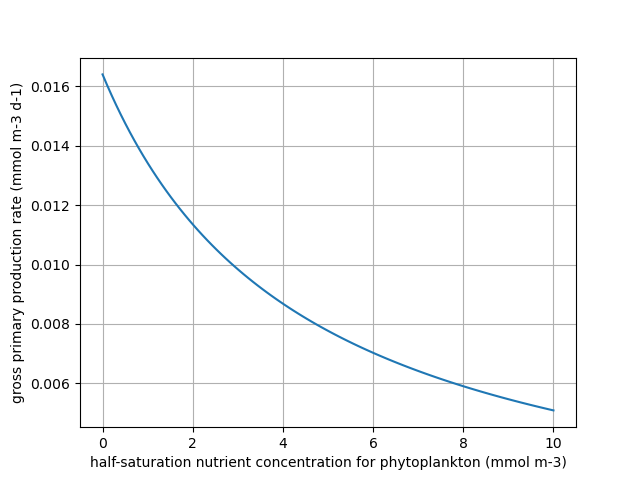

In [ ]:
# Plot the value of the diagnostic against the value of the varied parameter
fig, ax = matplotlib.pyplot.subplots()
ax.plot(parvalues, results)
ax.grid()
ax.set_xlabel(f"{parameter.long_name} ({parameter.units})")
ax.set_ylabel(f"{diagnostic.long_name} ({diagnostic.units})");